<a href="https://colab.research.google.com/github/dheekshadevaraj/HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file="https://raw.githubusercontent.com/swapnilsaurav/projects/refs/heads/main/Data%20Cleaning%20for%20HR%20Analytics%20v1.csv"
# Load updated dataset
df = pd.read_csv(file)

In [3]:
# Step 1: Remove duplicates
df = df.drop_duplicates()


In [12]:
# Step 2: Handle missing or invalid data
df["Name"] = df["Name"].fillna("Unknown")


In [13]:
import numpy as np

df["Email"] = df["Email"].replace(["unknown", "not_an_email"], np.nan)
df["Email"] = df["Email"].bfill()


In [7]:
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
df["Age"] = df["Age"].apply(lambda x: x if 18 <= x <= 70 else np.nan)
df["Age"] = df["Age"].fillna(df["Age"].median())

In [8]:
df["Salary"] = pd.to_numeric(df["Salary"], errors='coerce')
df["Salary"] = df["Salary"].apply(lambda x: x if x >= 0 else np.nan)
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())

In [9]:
df["JoinDate"] = pd.to_datetime(df["JoinDate"], errors='coerce')

In [10]:
df["Department"] = df["Department"].fillna("Not Specified")
df["Remarks"] = df["Remarks"].replace("", np.nan).fillna("No Remarks")

In [15]:
# Step 3: Treat Outliers
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df["Salary"] = np.clip(df["Salary"], lower_bound, upper_bound)


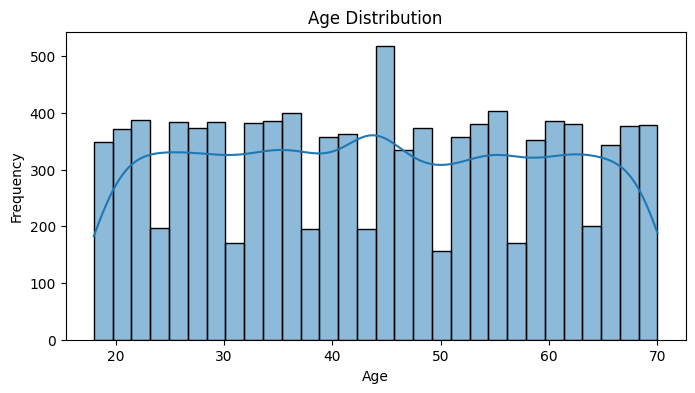

In [16]:
# Step 4: Visualizations

# 1. Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


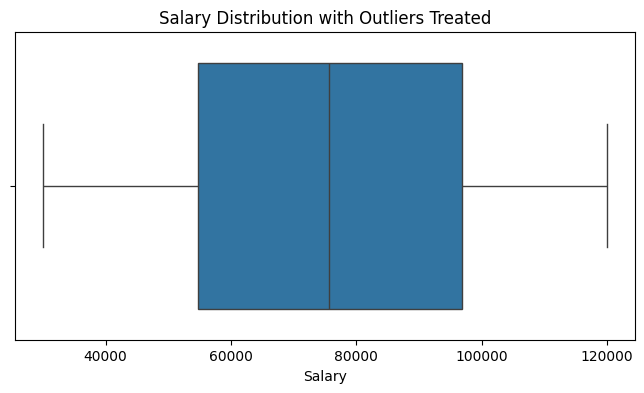

In [17]:
# 2. Salary Distribution
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Salary"])
plt.title("Salary Distribution with Outliers Treated")
plt.xlabel("Salary")
plt.show()


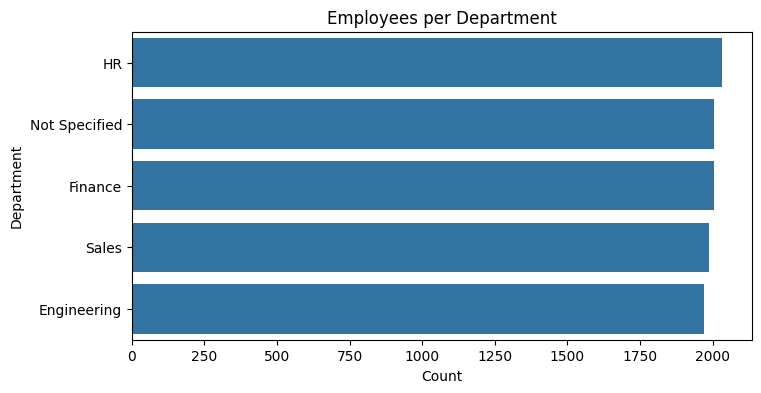

In [18]:
# 3. Department Counts
plt.figure(figsize=(8, 4))
sns.countplot(y="Department", data=df, order=df["Department"].value_counts().index)
plt.title("Employees per Department")
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()


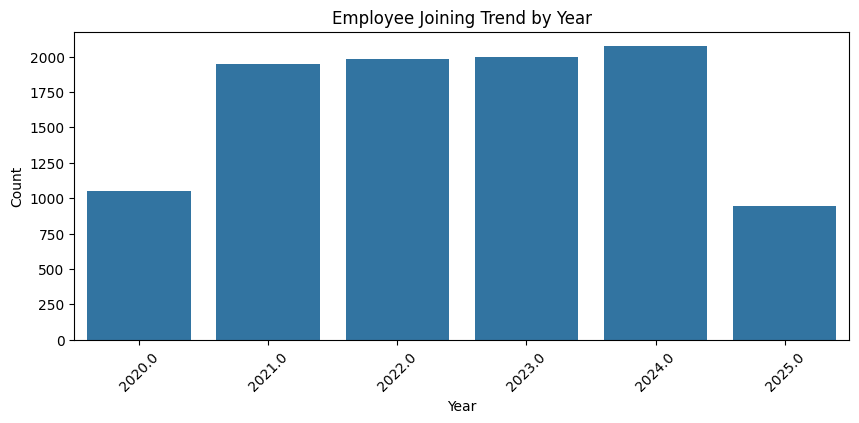

In [19]:
# 4. Join Date Trend
plt.figure(figsize=(10, 4))
df["JoinYear"] = df["JoinDate"].dt.year
sns.countplot(x="JoinYear", data=df.sort_values("JoinYear"))
plt.title("Employee Joining Trend by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()